In [5]:
# Beginning of "eda.ipynb"

# Exploratory Data Analysis

The following is the data analysis done after the first part of the project which was to create synthetic data that represents a transportation problem. Want to explore the results of said dataset.

In [6]:
# Import necessary libraries and modules
import yaml # Read config files
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 10)
import sys
sys.path.insert(0, "..")

from helper_funcs import query_tbl

## Section 1: Query Data from Database
### Establish a database connection using SQLAlchemy

Have the logic in a new helper function script that will be included in the project.

In [49]:
df = query_tbl("../config.yaml")

Table successfully read from PostgreSQL!
Read time: 0.180 seconds


In [8]:
# To see the demand
df.tail(15)
# To see production capacity
# df.head(15)

,index,customer_1,customer_2,customer_3,customer_4,...,customer_122,customer_123,customer_124,customer_125,production_capacity
61,factory_62,3,6,3,9,...,14,6,5,7,750.0
62,factory_63,9,2,2,5,...,15,1,8,1,375.0
63,factory_64,9,12,15,4,...,7,5,2,1,375.0
64,factory_65,6,9,11,14,...,7,9,5,7,500.0
65,factory_66,12,14,2,10,...,1,9,14,6,750.0
...,...,...,...,...,...,...,...,...,...,...,...
71,factory_72,6,13,8,4,...,6,3,4,3,500.0
72,factory_73,6,11,11,3,...,7,2,1,11,125.0
73,factory_74,1,3,14,11,...,3,7,4,4,750.0
74,factory_75,6,15,6,6,...,12,10,3,5,500.0


Want a subset that removes the final row and column which is the demand and production capacity, respectively.

In [9]:
trans_costs = df.iloc[:-1, 1:-1]
trans_costs.head(15)

,customer_1,customer_2,customer_3,customer_4,customer_5,...,customer_121,customer_122,customer_123,customer_124,customer_125
0,15,12,13,2,13,...,13,11,8,7,11
1,1,5,5,14,2,...,14,11,1,11,8
2,15,14,12,2,6,...,4,4,6,12,5
3,14,7,10,13,5,...,2,8,5,8,14
4,12,5,4,9,1,...,6,2,15,5,7
...,...,...,...,...,...,...,...,...,...,...,...
10,9,12,15,10,8,...,15,9,6,9,9
11,13,9,1,6,5,...,14,10,4,3,4
12,8,13,3,8,12,...,8,6,10,14,15
13,14,10,8,15,1,...,6,2,12,14,5


## Section 2: Metrics for the Dashboard
Want to gather the number of customers and number of factories.

In [10]:
num_of_plants = len(trans_costs.index)
print(f"The number of factories: {num_of_plants}")

The number of factories: 75


In [11]:
# Get the number of plants
num_of_customers = len(trans_costs.columns)
print(f"The number of customers: {num_of_customers}")

The number of customers: 125


Wanted a random subset of 15 customers to perform some analysis.

In [12]:
# Randomly select 15 columns
n_cols = 15
df2 = trans_costs.sample(
    n = n_cols,
    axis = 1
)
df2

,customer_53,customer_11,customer_15,customer_19,customer_61,...,customer_55,customer_10,customer_96,customer_46,customer_31
0,3,4,6,8,11,...,15,6,5,9,8
1,12,9,14,2,13,...,6,2,1,8,6
2,2,6,5,5,7,...,11,1,14,8,11
3,13,12,4,6,10,...,5,13,8,3,3
4,6,5,7,6,6,...,10,15,5,6,8
...,...,...,...,...,...,...,...,...,...,...,...
70,3,15,11,13,2,...,2,9,1,3,9
71,6,3,4,1,15,...,9,13,11,4,3
72,10,11,1,15,6,...,14,9,4,7,1
73,2,3,10,11,8,...,15,1,7,1,10


## Section 3: Plotting EDA

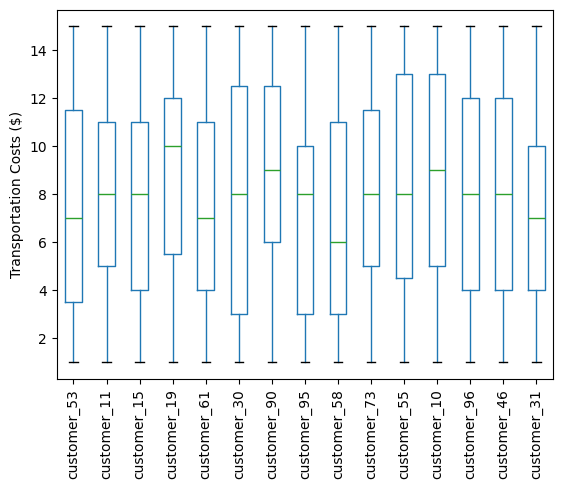

In [13]:
import matplotlib.pyplot as plt
df2.boxplot()
ax = plt.subplot()
ax.set_ylabel("Transportation Costs ($)")
# Hide grid lines
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

Now, want to recreate the same plot using the `plotnine` library. Will be using this library for the dashboard I am creating.

In [14]:
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    scale_x_discrete,
    labs,
    coord_flip,
    geom_histogram,
    theme,
    element_text
)

Melt the second data frame to get customers as values and their transportation cost as the other column. Easier for plotting in ggplot with Python

In [15]:
df3 = df2.melt()
df3

,variable,value
0,customer_53,3
1,customer_53,12
2,customer_53,2
3,customer_53,13
4,customer_53,6
...,...,...
1120,customer_31,9
1121,customer_31,3
1122,customer_31,1
1123,customer_31,10


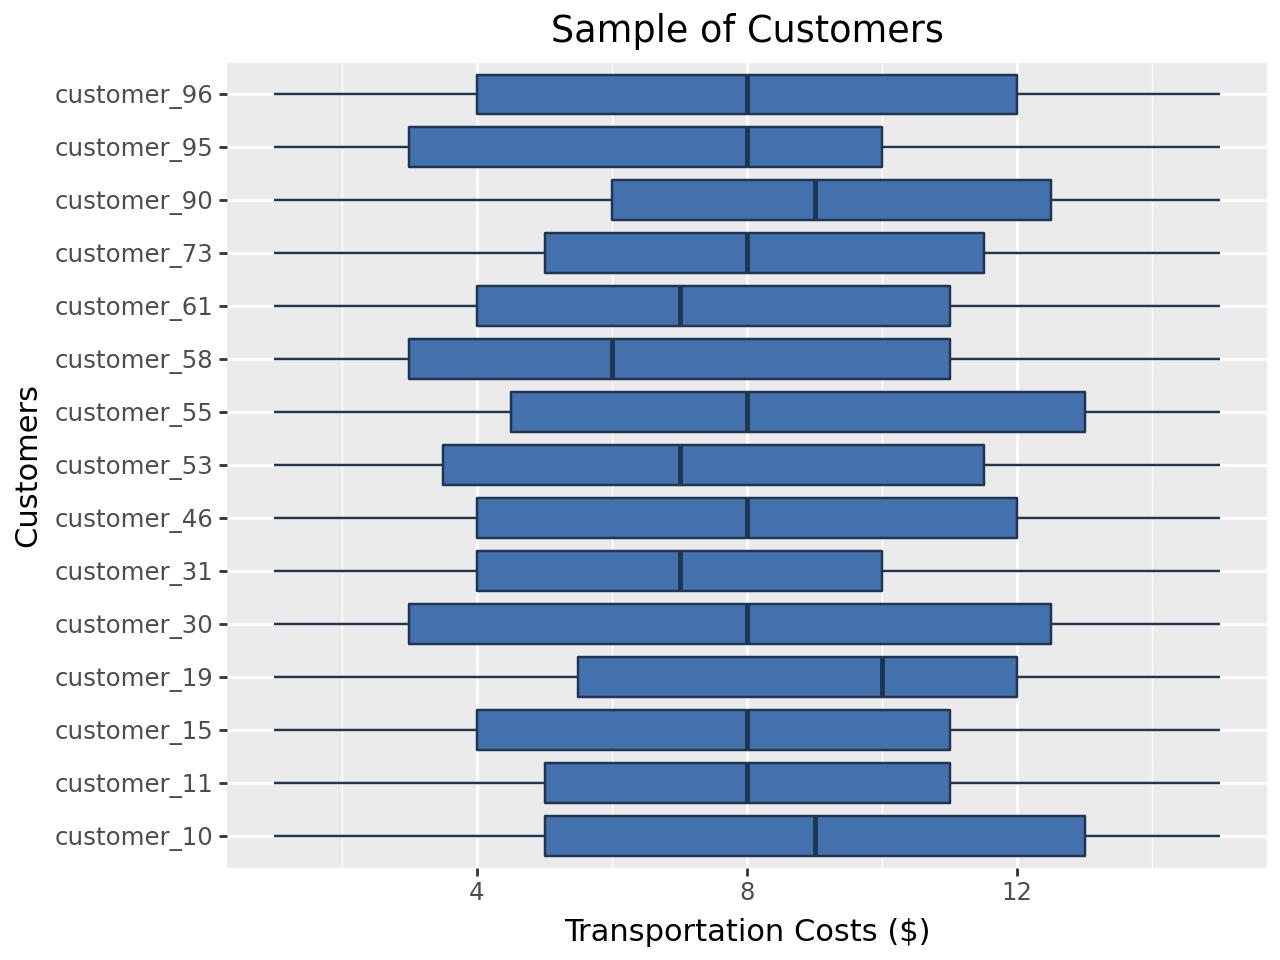

In [16]:
# Plotting Logic
(
    ggplot(df3)
    + aes(
        x="variable",
        y="value"
        ) 
    + scale_x_discrete(
        name="Customers"
        )
    + labs(
        title="Sample of Customers",
        y="Transportation Costs ($)"
        )
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE"
        )
    + coord_flip()
)

In [17]:
df2.head()

,customer_53,customer_11,customer_15,customer_19,customer_61,...,customer_55,customer_10,customer_96,customer_46,customer_31
0,3,4,6,8,11,...,15,6,5,9,8
1,12,9,14,2,13,...,6,2,1,8,6
2,2,6,5,5,7,...,11,1,14,8,11
3,13,12,4,6,10,...,5,13,8,3,3
4,6,5,7,6,6,...,10,15,5,6,8


In [18]:
trans_costs.mean()

customer_1      9.173333
customer_2      8.000000
customer_3      8.266667
customer_4      7.013333
customer_5      7.026667
                  ...   
customer_121    7.400000
customer_122    8.120000
customer_123    7.506667
customer_124    7.853333
customer_125    6.440000
Length: 125, dtype: float64

Will extract the demand and production capacity as Pandas Dataframe to get an instagram.

In [50]:
# Extract the demand row into its own Pandas Series
# demand = df.iloc[:,-1]
demand = df.iloc[-1,:]
type(demand)

pandas.core.series.Series

In [51]:
# Convert from series to dataframe
demand = demand.to_frame(name = 'demand')
demand

,demand
index,demand
customer_1,200
customer_2,60
customer_3,230
customer_4,280
...,...
customer_122,80
customer_123,220
customer_124,220
customer_125,80


In [52]:
# Drop NAs from the dataframe
demand = demand.dropna()
# demand.drop(demand.iloc[0], axis=0)
demand

,demand
index,demand
customer_1,200
customer_2,60
customer_3,230
customer_4,280
...,...
customer_121,280
customer_122,80
customer_123,220
customer_124,220


In [53]:
demand = demand.iloc[1:, :]

In [54]:
demand

,demand
customer_1,200
customer_2,60
customer_3,230
customer_4,280
customer_5,90
...,...
customer_121,280
customer_122,80
customer_123,220
customer_124,220


In [55]:
demand = demand.reset_index()
demand = demand.drop(labels="index", axis=1)
demand

,demand
0,200
1,60
2,230
3,280
4,90
...,...
120,280
121,80
122,220
123,220


In [24]:
print(f"The average demand (units) per customer: {demand.mean()}")

The average demand (units) per customer: demand    183.92
dtype: object


Going to comment-out the following blocks/cells of code. Some of the logic applied to the demand as a Series, that is, before converting it to a Dataframe. And second cell has plotting logic but only for `matplotlib` and didn't feel an urgency to update it because we're working with ggplot (plotnine) now.

In [25]:
# Resetting the index
# demand = demand.reset_index()
# demand = demand.iloc[:,-1]
# demand.columns = demand.iloc[0]
# print(demand.shape)
# print(demand)

Now, want to create a histogram from the Pandas Series.

In [26]:
# # For density histogram
# # demand.plot(kind='hist', density=True)
# demand.plot(kind='hist', color = 'green', edgecolor='black', bins=10)
# plt.show()

Create the same histogram but using ggplot.

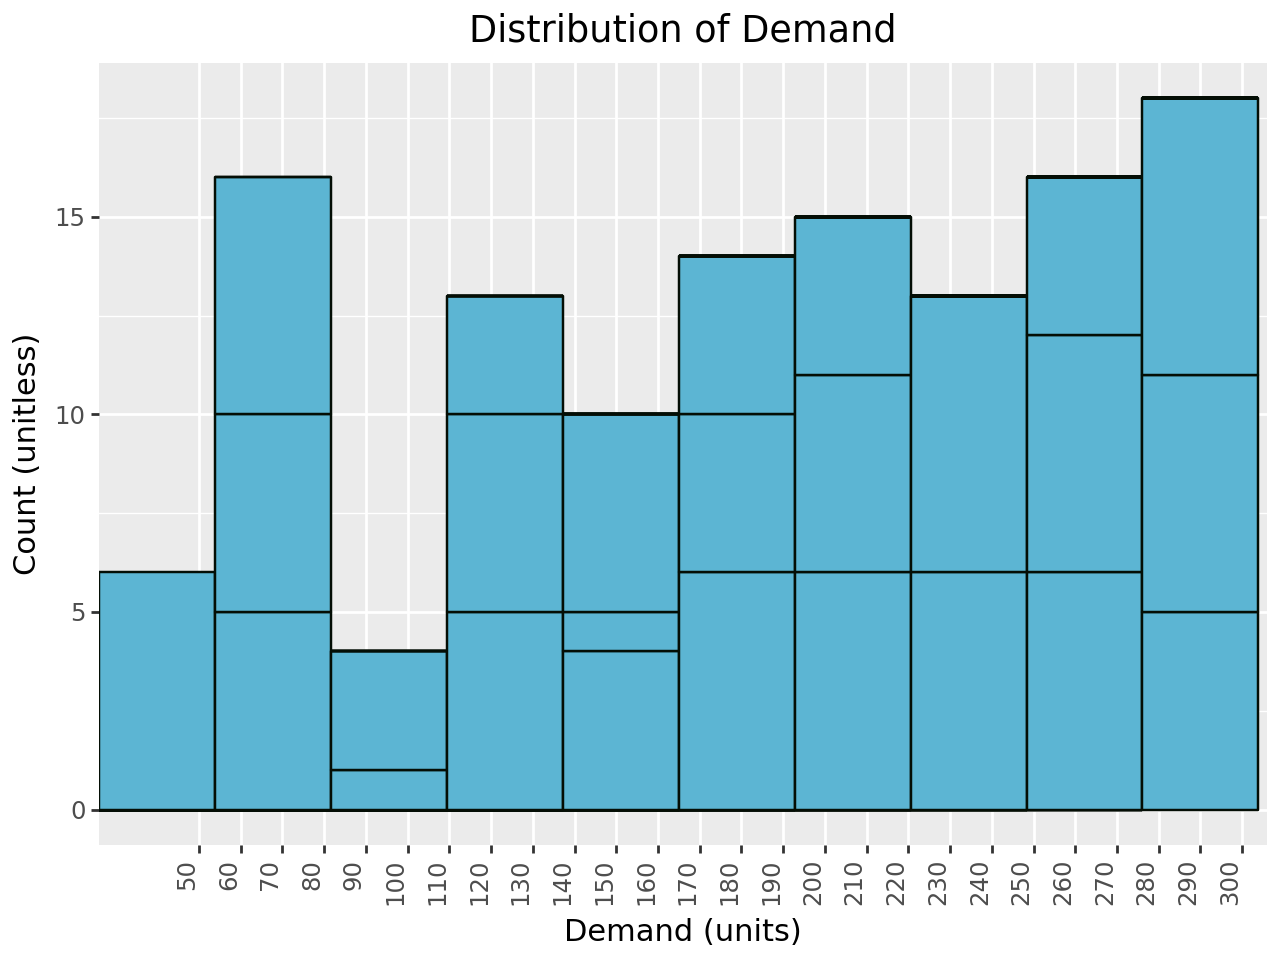

In [27]:
# Plotting Logic
(
    ggplot(
        demand
        )
    + aes(
        x='demand'
        )
    + geom_histogram(
        bins=10,
        fill='#5cb5d3',
        color='#040e05'
        )
    + labs(
        title="Distribution of Demand",
        x="Demand (units)",
        y="Count (unitless)"
        )
    + theme(
        axis_text_x=element_text(
            rotation=90,
            hjust=1
            )
        )
)

In [28]:
# Pull the last column which is the production capacity
prod_cap = df.iloc[:,-1]
# Remove NA's
prod_cap = prod_cap.dropna()
# Turn data type from float to integer
prod_cap = prod_cap.astype(int)
# Convert from series to dataframe
prod_cap = prod_cap.to_frame(name = 'production_capacity')
print(prod_cap)

    production_capacity
0                   625
1                   250
2                   375
3                   625
4                   125
..                  ...
70                  375
71                  500
72                  125
73                  750
74                  500

[75 rows x 1 columns]


In [29]:
type(prod_cap)

pandas.core.frame.DataFrame

In [30]:
print(f"Average production capacity for all plants: {prod_cap["production_capacity"].mean()}")

Average production capacity for all plants: 446.6666666666667


Want to combine the `demand` and the `prod_cap` dataframes into one even if their lengths are different. This will make it easier when working with Shiny.

In [58]:
prod_cap

,production_capacity
0,625
1,250
2,375
3,625
4,125
...,...
70,375
71,500
72,125
73,750


In [59]:
demand

,demand
0,200
1,60
2,230
3,280
4,90
...,...
120,280
121,80
122,220
123,220


In [60]:
eda_df = pd.concat(
    [
        prod_cap,
        demand
    ],
    axis=1
# ).reindex(prod_cap.index)
)
eda_df

,production_capacity,demand
0,625.0,200
1,250.0,60
2,375.0,230
3,625.0,280
4,125.0,90
...,...,...
120,NaN,280
121,NaN,80
122,NaN,220
123,NaN,220


Want to confirm the number of "not a numbers" in the production_capacity column.

In [62]:
count_nan = eda_df['production_capacity'].isnull().sum()
print("Number of NaN values present: " + str(count_nan))

Number of NaN values present: 50


So the above confirms that the column has the expected number of NaN's.

The following is a plot using `matplotlib`. Will use ggplot after.

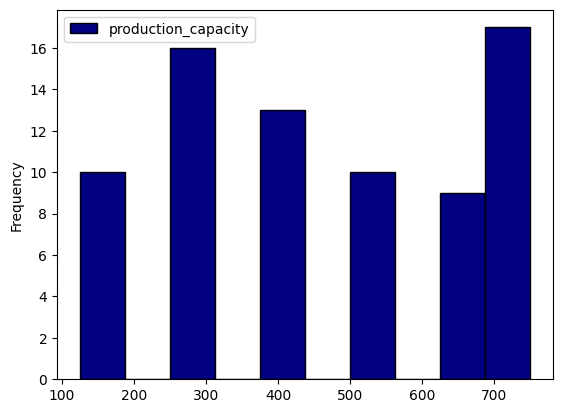

In [31]:
# Histogram plot
prod_cap.plot(kind='hist', color = 'navy', edgecolor='black', bins=10)
plt.show()

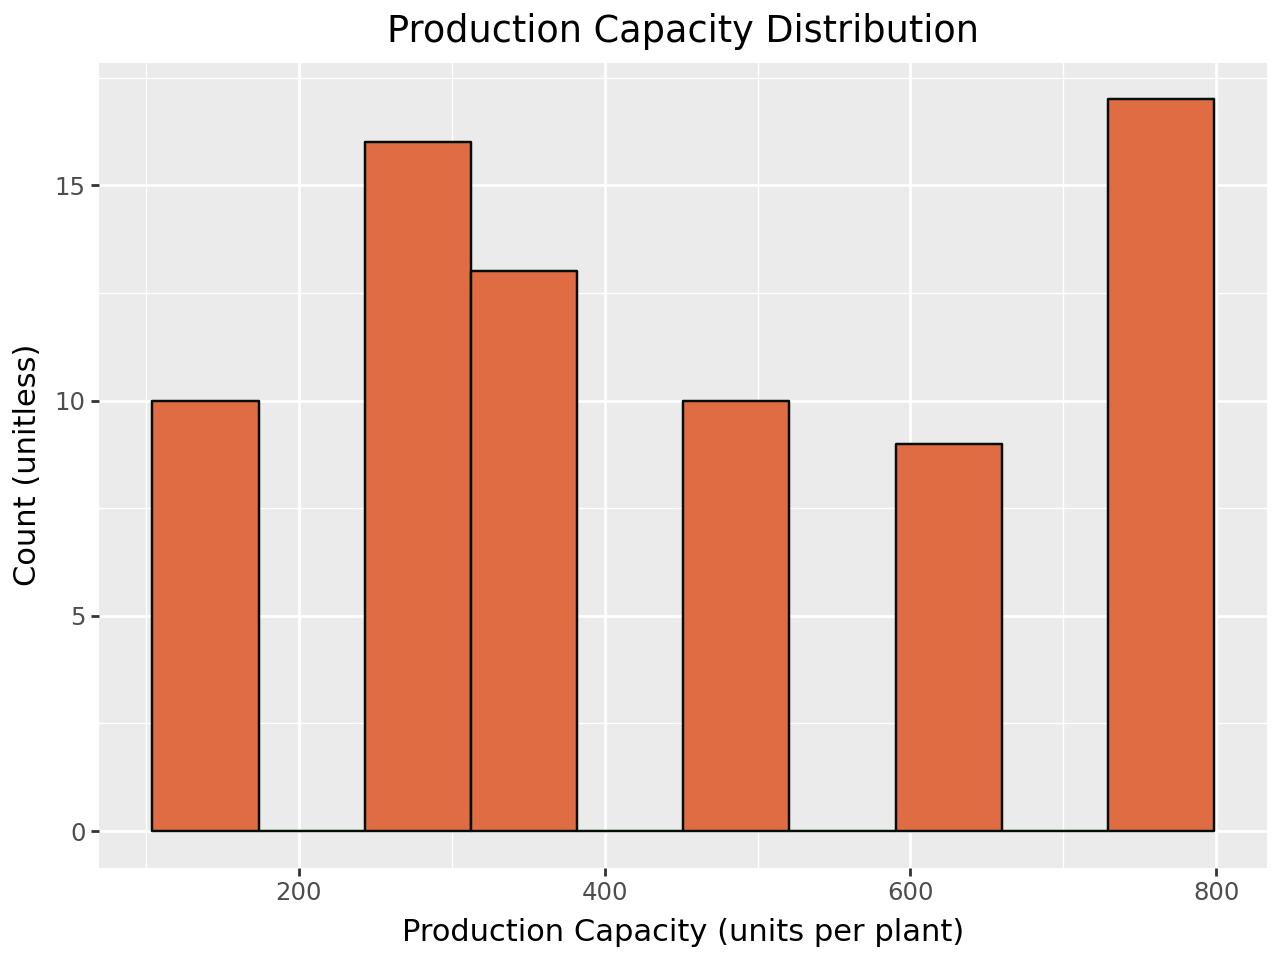

In [32]:
# Plotting Logic
(
    ggplot(
        prod_cap
        )
    + aes(
        x='production_capacity'
        )
    + geom_histogram(
        bins=10,
        fill='#e06c43',
        color='#040e05'
        )
    + labs(
        title="Production Capacity Distribution",
        x="Production Capacity (units per plant)",
        y="Count (unitless)"
        )
)

## Conclusion

So was able to determine some metrics and plots including boxplots and histograms to give an initial view of the synthetic data for the transportation problem.

In [33]:
# End of "eda.ipynb"